# Finding Pi using Monte Carlo 
> throwing darts at a circle to calculate pi

- date: 2018-08-10
- toc: true
- tags: [algorithims]

pi can be approximated by throwing darts at a circle in a square, and calculating the ratio of darts landing on the circle vs the square.

In [4]:
#hide
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## simple way

First, we generate a bunch of throws by using random.random()

We are throwing darts in only the top right quadrant of the square, so the origin is the center of the square, and the diameter of the circle is 2.

We figure out if the points are in the circle by using the pythogeras theorem to calculate the distance of each point from the origin `(0,0)`. If the distance is greater than the radius of the circle, it's outside.

In [5]:
darths_thrown = 10000
throws = [[random.random(), random.random()] for i in range(darths_thrown)]

in_circle=0
out_circle=0

for throw in throws:
    if math.sqrt(throw[0]**2 + throw[1]**2) <= 1:
        in_circle +=1
    else:
        out_circle += 1

pi_estimate = in_circle/len(throws) * 4

print(f'estimate: {pi_estimate}')
print(f'actual: {math.pi}')
print(f'difference is {abs(pi_estimate-math.pi)}')

estimate: 3.1232
actual: 3.141592653589793
difference is 0.018392653589792918


## now to jazz this up visually

Putting our random darts in a dataframe to make it easier to eyeball:

In [7]:
df = pd.DataFrame(np.random.rand(darths_thrown,2)*2, columns=["x", "y"])
df.head(2)

,x,y
0,1.849016,0.329357
1,0.522901,1.703207


Now to label each darth thrown if its inside or outside the circle:

In [9]:
def is_in_circle(row):
    x = row['x']
    y = row['y']
    if math.sqrt((x-1)**2 + (y-1)**2) <= 1:
        return True
    else:
        return False

df['In_Circle'] = df.apply(is_in_circle, axis=1)
df.head(4)

,x,y,In_Circle
0,1.849016,0.329357,False
1,0.522901,1.703207,True
2,1.694082,1.474200,True
3,1.820643,1.966332,False


Now to eyeball the random darts, coloured by whether they are in or outside the circle:

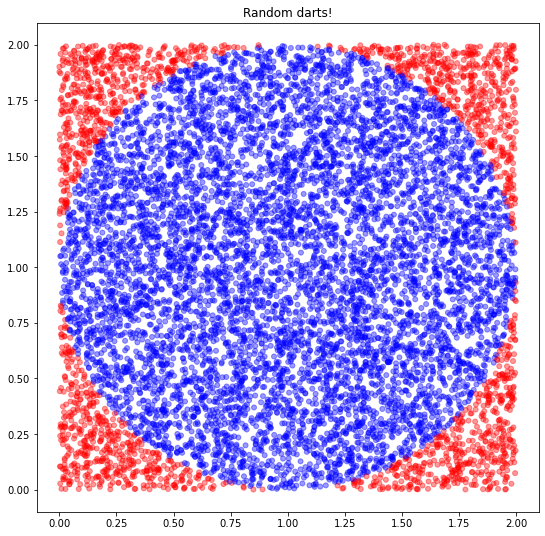

In [12]:
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title("Random darts!")
ax.scatter(df['x'], df['y'], c=[within and 'blue' or 'red' for within in df['In_Circle']], alpha=0.4,s= 25);

the ratio of the area of the circle divided by the area of the square gives us pi/4:

In [13]:
pi_estimate = df['In_Circle'].sum() / len(df) * 4
pi_estimate

3.148

In [14]:
pi_estimate - math.pi

0.0064073464102070155

So the estimate is pretty close! Neat, since all it took was some very simple maths and a random number generator.